# Sleep, Health & Lifestyle

**Dataset Overview:**
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

**Key Features of the Dataset:**

Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.

Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.

Cardiovascular Health: Examine blood pressure and heart rate measurements.

Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

**Dataset Columns:**

Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).


**Details about Sleep Disorder Column:**

None: The individual does not exhibit any specific sleep disorder.

Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.

Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

# Import Libraries

In [1]:
#For numeric computation
import numpy as np
#For data manipulation
import pandas as pd
#For visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#For statistical analysis
from scipy.stats import pearsonr
from sklearn.manifold import TSNE
#For encoding categorical data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder 
#For scaling data values to make them all comparable
from sklearn.preprocessing import StandardScaler
#For splitting a data set into training and testing for validation
from sklearn.model_selection import train_test_split
#For reducing dimensions of a dataset to use only the necessary features
from sklearn.decomposition import PCA
#For creating a step-by-step preprocessing and modeling function
from sklearn.pipeline import Pipeline
#For evaluating the performance of our models
from sklearn.metrics import confusion_matrix, classification_report
#The models that will be used to train and will be evaluated
from sklearn.ensemble import RandomForestClassifier
#To set the style and/or colors of the visualisations
sns.set_style('whitegrid')

### Importing Data

In [2]:
#Saving the dataset into a variable called "sleep_df"
sleep_df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')

### Overview of the Data

In [3]:
#A quick overview of what the dataset we're about to
# work with looks like
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
#Checking for missing data in our dataset,
# what datatypes are included in our features
# and target variable and the shape of the dataset
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
#A brief overview of the statistical measures of the numerical features.
sleep_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Before any analysis can be conducted, Blood Pressure needs to be identified as a numeric column. To do that the figures would need to be split into their systolic and diastolic readings.

In [6]:
#Split the blood pressure and store it as a list
blood_pressure = [i for i in sleep_df['Blood Pressure'].str.split('/')]

#Make the list into a DataFrame and store them in their respective
# column names in the sleep_df
sleep_df[['Systolic', 'Diastolic']] = pd.DataFrame(blood_pressure).astype(int)
sleep_df = sleep_df.drop('Blood Pressure', axis=1)


In [7]:
sleep_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [8]:
#This is to count the occurence of categories in the 'Sleep Disorder' column
sleep_df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [9]:
#Counting the occurence of categorical variables in the "BMI Category" column.
sleep_df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

We need to either keep the category Normal or Nomal Weight since they both signify the same weight type. In this case Normal will be kept.

In [10]:
#Instatiating an empty list to later append the appropriate BMI Category
bmi_category = []

#Creating a loop to go through each category variable in the "BMI Category" column
for i in sleep_df['BMI Category']:
    #The below statement reads "if the category variable is not the same as 'Normal Weight'
    # then we append the categorical variable to the empty list bmi_category otherwise append
    # the variable 'Normal'"
    if i != 'Normal Weight':
        bmi_category.append(i)
    else:
        bmi_category.append('Normal')
#Here we replace the old 'BMI Category' column with the new variables saved into the bmi_category list.
sleep_df['BMI Category'] = bmi_category

In [11]:
#Re-checking the occurence to see if there's no "Normal Weight" included.
sleep_df['BMI Category'].value_counts()

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64

In [12]:
#Checking the value counts of the Gender column
sleep_df['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

The male and female genders seem to be somewhat evenly represented in this dataset, with there being only 4 males than females. 

In [13]:
#Checking how spread out the ocupation categories are
sleep_df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

There are more representatitives in occupation than others. To reduce the effect of this on our dataset an option could be to further categorise them. For instance:

Nurse and Doctor could be under **Health** <br>
Engineer, Software Engineer and Scientist could be under **Science and Engineering** <br>
Lawyer and Teacher could be under **Law and Humanities** <br>
Accountant and Manager could be under **Business** <br>
Salesperson and Sales Representative could be under **Sales**

## Exploratory Data Analysis

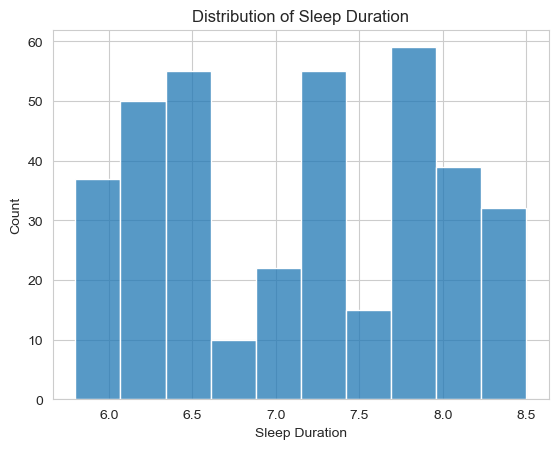

In [14]:
sns.histplot(sleep_df, x='Sleep Duration')
plt.title('Distribution of Sleep Duration')
plt.show()

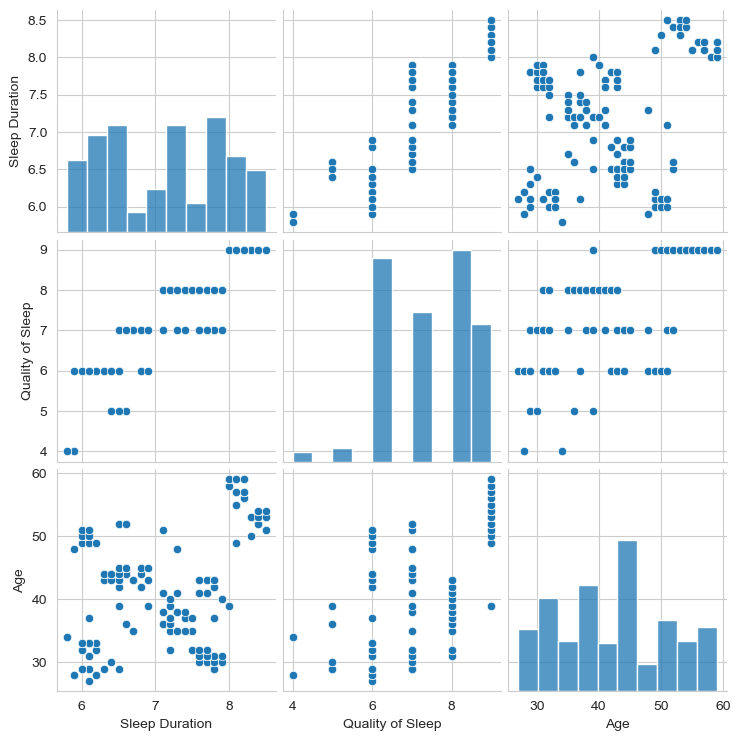

In [15]:
sns.pairplot(sleep_df[['Sleep Duration', 'Quality of Sleep', 'Age']])
plt.show()

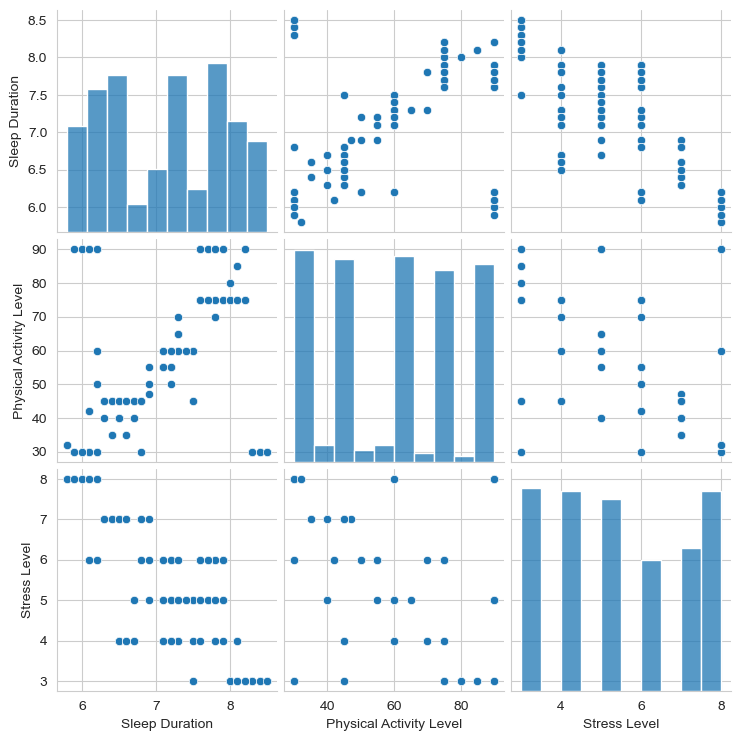

In [16]:
sns.pairplot(sleep_df[['Sleep Duration', 'Physical Activity Level', 'Stress Level']])
plt.show()

In [17]:
correlation, pvalue = pearsonr(sleep_df['Sleep Duration'], sleep_df['Physical Activity Level'])
print(correlation)

0.21236031472575928


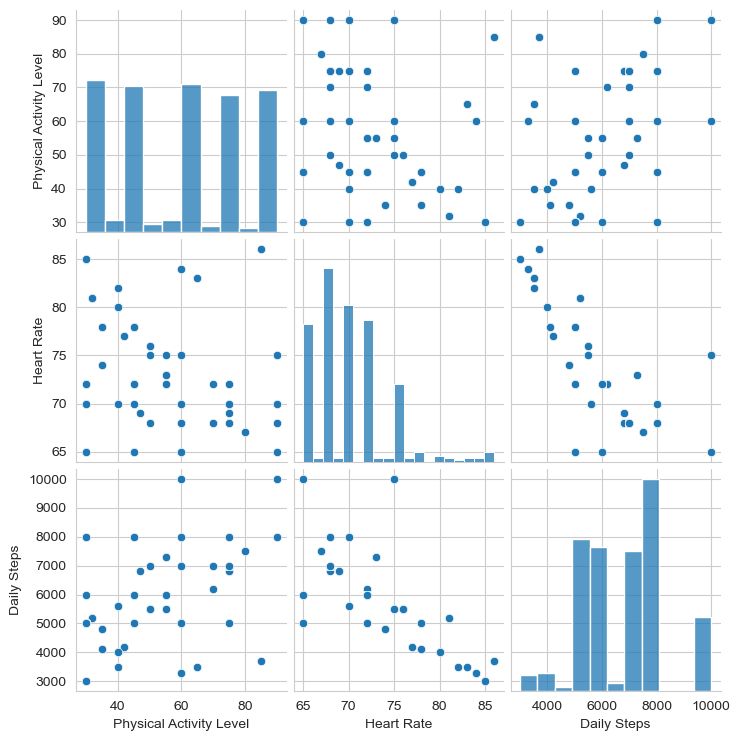

In [18]:
sns.pairplot(sleep_df[['Physical Activity Level', 'Heart Rate', 'Daily Steps']])
plt.show()

In [19]:
correlation, pvalue = pearsonr(sleep_df['Heart Rate'], sleep_df['Daily Steps'])
print(correlation)

-0.030308575297108956


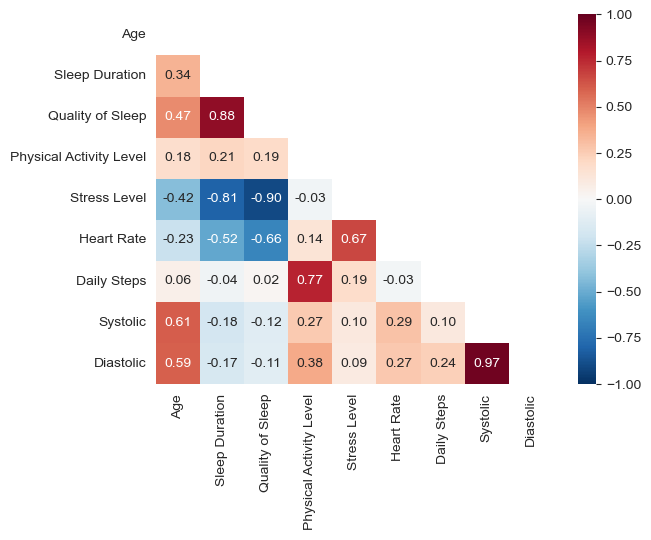

In [20]:
corr = sleep_df.drop('Person ID', axis=1).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, fmt='.2f', cmap='RdBu_r')
plt.show()

In [21]:
px.box(sleep_df, x='BMI Category', y='Physical Activity Level',
       color='BMI Category', title='Physical Activity Level by BMI Category')

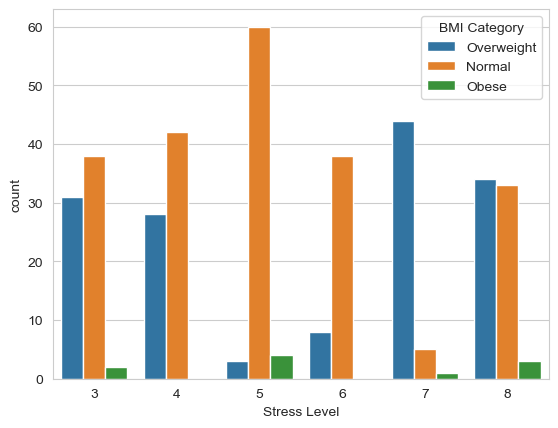

In [22]:
sns.countplot(data=sleep_df, x='Stress Level', hue='BMI Category')
plt.show()

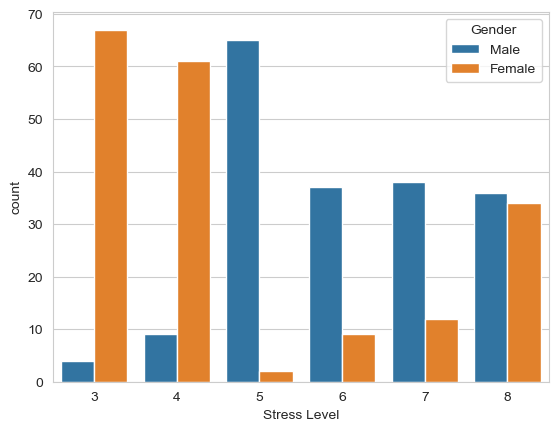

In [23]:
sns.countplot(data=sleep_df, x='Stress Level', hue='Gender')
plt.show()

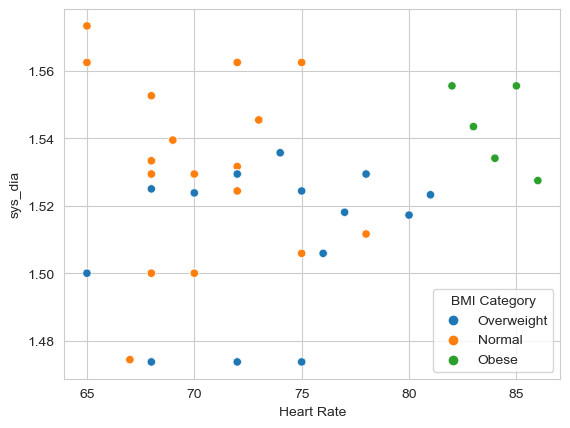

In [24]:
sleep_df['sys_dia'] = sleep_df['Systolic'] / sleep_df['Diastolic']
sns.scatterplot(data=sleep_df, x='Heart Rate', y='sys_dia', hue='BMI Category')
plt.show()

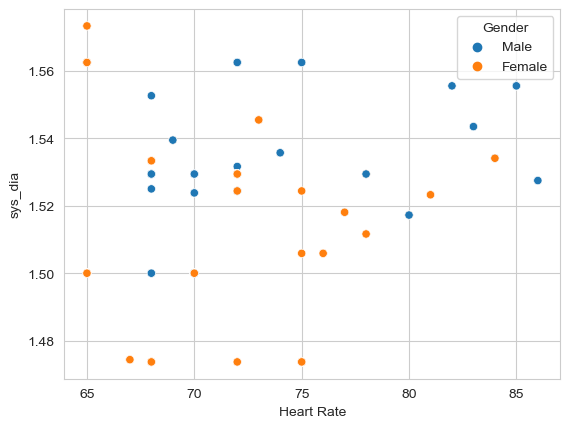

In [25]:
sns.scatterplot(data=sleep_df, x='Heart Rate', y='sys_dia', hue='Gender')
plt.show()

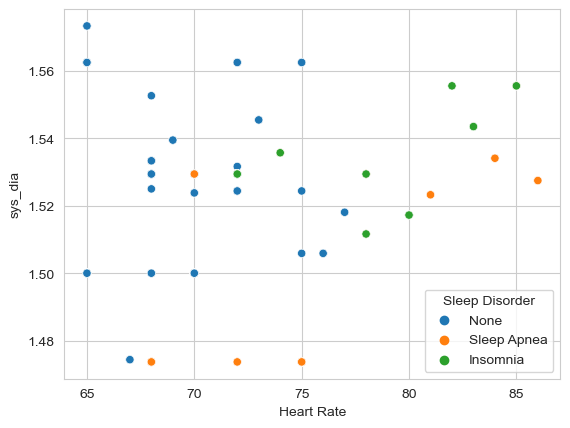

In [26]:
sns.scatterplot(data=sleep_df, x='Heart Rate', y='sys_dia', hue='Sleep Disorder')
plt.show()

In [27]:
px.histogram(sleep_df, x='Sleep Disorder', title='Sleep Disorder Occurrence')

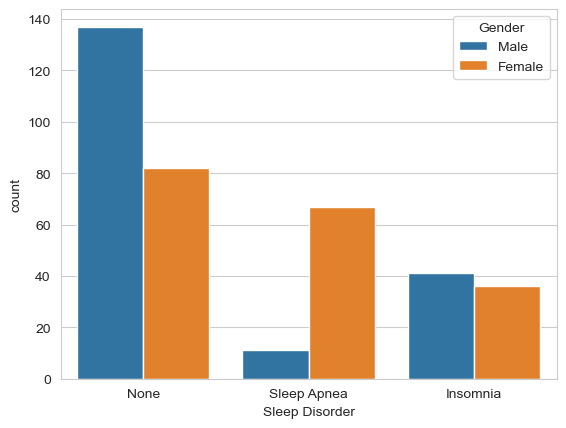

In [28]:
sns.countplot(data=sleep_df, x='Sleep Disorder', hue='Gender')
plt.show()

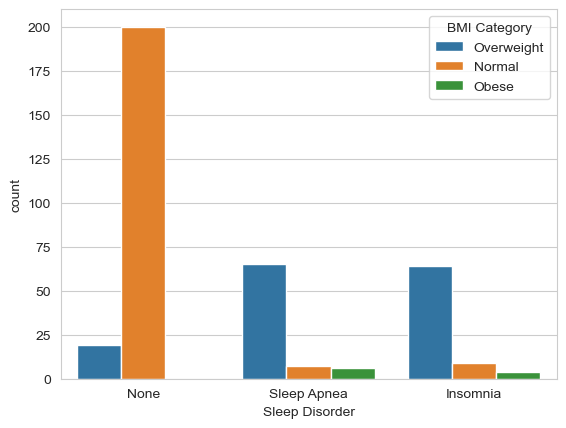

In [29]:
sns.countplot(data=sleep_df, x='Sleep Disorder', hue='BMI Category')
plt.show()

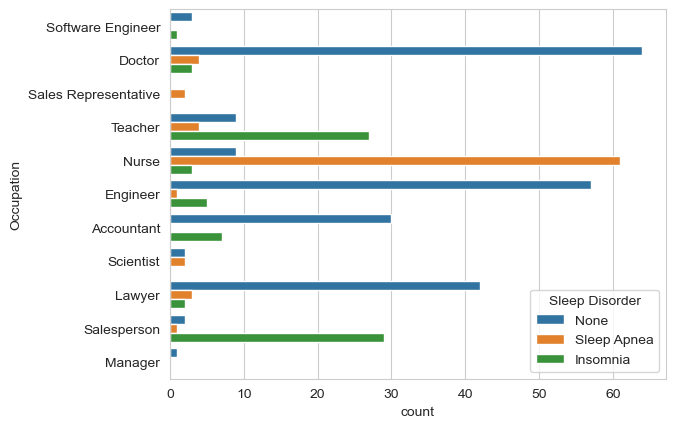

In [30]:
sns.countplot(data=sleep_df, y='Occupation', hue='Sleep Disorder')
plt.show()

In [31]:
non_numeric = ['BMI Category', 'Sleep Disorder', 'Gender', 'Occupation', 'Systolic', 'Diastolic']
df_numeric = sleep_df.drop(non_numeric, axis=1)

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(df_numeric)

tsne_features[1:4, :]

c:\Users\raksk\anaconda3\envs\snowflakes\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



array([[16.721672 , 13.394829 ],
       [16.721582 , 13.397391 ],
       [15.677218 , -5.7276034]], dtype=float32)

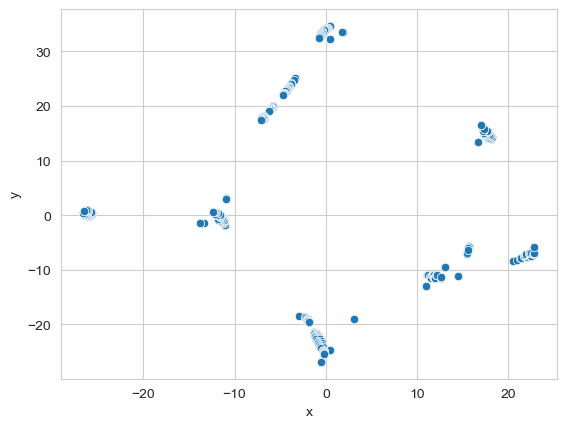

In [32]:
sleep_df['x'] = tsne_features[:, 0]
sleep_df['y'] = tsne_features[:, 1]

sns.scatterplot(data=sleep_df, x='x', y='y')
plt.show()

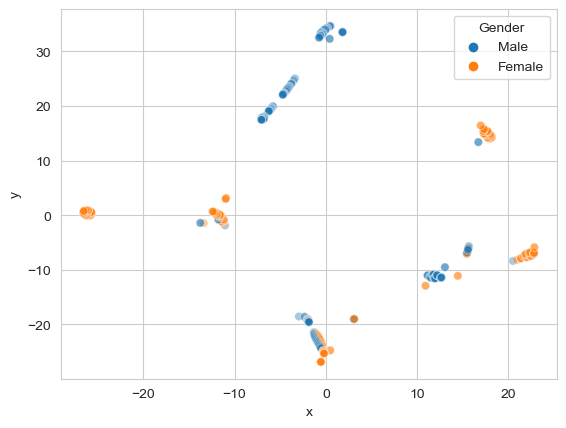

In [33]:
sns.scatterplot(data=sleep_df, x='x', y='y', hue='Gender', alpha=0.4)
plt.show()

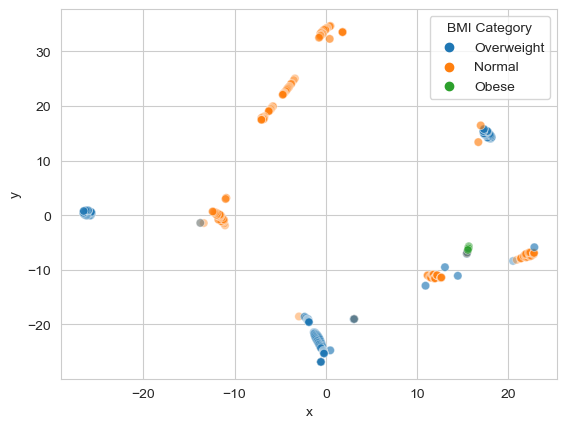

In [34]:
sns.scatterplot(data=sleep_df, x='x', y='y', hue='BMI Category', alpha=0.4)
plt.show()

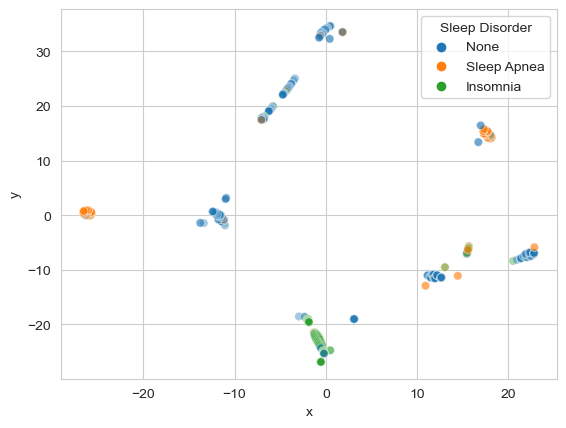

In [35]:
sns.scatterplot(data=sleep_df, x='x', y='y', hue='Sleep Disorder', alpha=0.4)
plt.show()

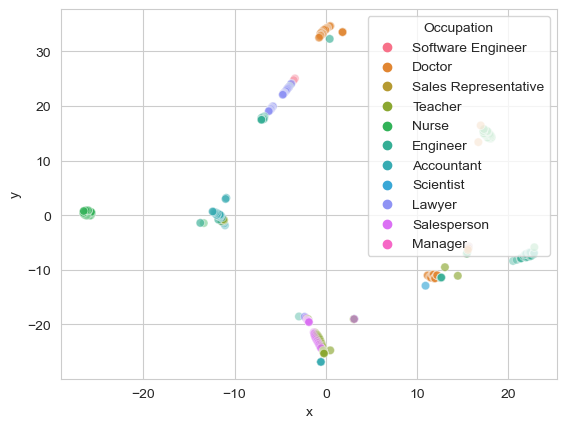

In [36]:
sns.scatterplot(data=sleep_df, x='x', y='y', hue='Occupation', alpha=0.4)
plt.show()

In [37]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,sys_dia,x,y
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83,1.518072,15.449227,-7.063114
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,1.562500,16.721672,13.394829
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,1.562500,16.721582,13.397391
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,1.555556,15.677218,-5.727603
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,1.555556,15.677217,-5.727713


## Feature Engineering

In [38]:
sleep_enc_df = sleep_enc_df.drop('Person ID', axis=1)
sleep_enc_df = pd.get_dummies(sleep_df, columns=['Gender', 'Occupation'], drop_first=True)

NameError: name 'sleep_enc_df' is not defined

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,1,27,6.1,6,42,6,1.0,77,4200,1,...,0,0,0,0,0,0,0,0,1,0
1,2,28,6.2,6,60,8,0.0,75,10000,1,...,1,0,0,0,0,0,0,0,0,0
2,3,28,6.2,6,60,8,0.0,75,10000,1,...,1,0,0,0,0,0,0,0,0,0
3,4,28,5.9,4,30,8,2.0,85,3000,2,...,0,0,0,0,0,1,0,0,0,0
4,5,28,5.9,4,30,8,2.0,85,3000,2,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
ord = OrdinalEncoder(categories=[['Normal', 'Overweight', 'Obese']])
ord.fit(sleep_enc_df['BMI Category'].values.reshape(-1,1))
sleep_enc_df['BMI Category'] = ord.transform(sleep_enc_df['BMI Category'].values.reshape(-1,1))

In [ ]:
le = LabelEncoder()
le.fit(sleep_enc_df['Sleep Disorder'].values)
sleep_enc_df['Sleep Disorder'] = le.transform(sleep_enc_df['Sleep Disorder'].values)

## Modeling

In [ ]:
X = sleep_enc_df.drop('Sleep Disorder', axis=1).values
y = sleep_enc_df['Sleep Disorder'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.40, random_state=21)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=5)
pca.fit(X_train_scaled)
print(pca.explained_variance_ratio_.cumsum())
pc = pca.transform(X_train_scaled)

[0.23782797 0.42073544 0.56193417 0.63291272 0.69630521]


In [ ]:
pc_test = pca.transform(X_test_scaled)

In [ ]:
rf = RandomForestClassifier(random_state=21)
rf.fit(pc, y_train)

RandomForestClassifier(random_state=21)

In [ ]:
rf.score(pc_test, y_test)

0.9066666666666666

In [ ]:
rf.score(pc, y_train)

1.0

In [ ]:
confusion_matrix(y_test, rf.predict(pc_test))

array([[27,  3,  1],
       [ 2, 82,  4],
       [ 2,  2, 27]], dtype=int64)

In [ ]:
target_names = ['0', '1', '2']
print(classification_report(y_test, rf.predict(pc_test), target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.94      0.93      0.94        88
           2       0.84      0.87      0.86        31

    accuracy                           0.91       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.91      0.91      0.91       150

